In [42]:
from __future__ import annotations

from dateutil.parser import parse
import datetime
import json

class SpeedTestLoggerResults:
    @staticmethod
    def load(results_file_path: str) -> SpeedTestLoggerResults:
        results = []
        with open(results_file_path) as results_file:
            for line in results_file:
                results.append(json.loads(line))
        
        return SpeedTestLoggerResults(results)
    
    def __init__(self, result_jsons: [dict]):
        self.results = result_jsons

        for result in self.results:
            result['timestamp'] = self.__parse_timestamp(result['timestamp'])

    def __parse_timestamp(self, ts: str) -> datetime.datetime:
        return parse(ts).replace(tzinfo=datetime.timezone.utc).astimezone(tz=None)
    
    def __getitem__(self, keys):
        filtered = self.results
        if isinstance(keys, str):
            keys = (keys, )
        if isinstance(keys, tuple):
            for key in keys:
                filtered = [f[key] for f in filtered]
        return filtered

In [43]:
results = SpeedTestLoggerResults.load('results')

results.results[0]

{'type': 'result',
 'timestamp': datetime.datetime(2021, 2, 16, 14, 11, 25, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=75600), '-03')),
 'ping': {'jitter': 0.539, 'latency': 85.318},
 'download': {'bandwidth': 3073767, 'bytes': 34860672, 'elapsed': 11510},
 'upload': {'bandwidth': 296232, 'bytes': 1068672, 'elapsed': 3604},
 'packetLoss': 0,
 'isp': 'Vivo',
 'interface': {'internalIp': '192.168.15.225',
  'name': 'eth0',
  'macAddr': 'B8:27:EB:AE:F3:81',
  'isVpn': False,
  'externalIp': '177.43.14.170'},
 'server': {'id': 16638,
  'name': 'BBG Telecom',
  'location': 'Camaragibe',
  'country': 'Brazil',
  'host': 'speedtest.bbgtelecom.com.br',
  'port': 8080,
  'ip': '168.90.226.201'},
 'result': {'id': '4734305f-c975-448f-ab1e-4b9343abb0ce',
  'url': 'https://www.speedtest.net/result/c/4734305f-c975-448f-ab1e-4b9343abb0ce'}}

(array([2., 0., 0., 1., 0., 0., 1., 2., 2., 4.]),
 array([17.8844   , 18.6419896, 19.3995792, 20.1571688, 20.9147584,
        21.672348 , 22.4299376, 23.1875272, 23.9451168, 24.7027064,
        25.460296 ]),
 <BarContainer object of 10 artists>)

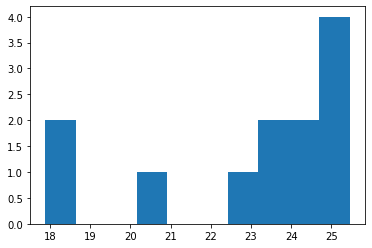

In [49]:
import matplotlib.pyplot as plt

download_bandwidths = results['download', 'bandwidth']
download_bandwidths_in_Mbps = [bw * 8 / 1000000.0 for bw in download_bandwidths]

plt.hist(download_bandwidths_in_Mbps)

(array([1., 0., 0., 3., 1., 0., 1., 1., 1., 4.]),
 array([2.289264 , 2.2974496, 2.3056352, 2.3138208, 2.3220064, 2.330192 ,
        2.3383776, 2.3465632, 2.3547488, 2.3629344, 2.37112  ]),
 <BarContainer object of 10 artists>)

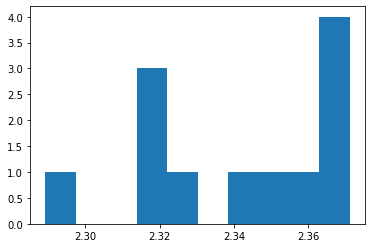

In [50]:
upload_bandwidths = results['upload', 'bandwidth']
upload_bandwidths_in_Mbps = [bw * 8 / 1000000.0 for bw in upload_bandwidths]

plt.hist(upload_bandwidths_in_Mbps)